# SI 618 - Homework #6: Machine Learning 1

Version 2024.03.20.2.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [78]:
# the data file is distributed via the Canvas assignment page
marketing = pd.read_csv('marketing_campaign.csv', sep='\t')

In [79]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [80]:
marketing.shape

(2240, 29)

In [81]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 34 missing values in `Income`, which probably needs to deal with later.

### Customer Demographics

In [82]:
# Calculate the age of the customers
marketing['age'] = 2024 - marketing['Year_Birth']
marketing['age'] = marketing['age'].astype(int)

In [83]:
# Show the desciptive statistics of the age, education, marital status, income, and number of children
marketing[['age', 'Income', 'Kidhome', 'Teenhome']].describe()

,age,Income,Kidhome,Teenhome
count,2240.000000,2216.000000,2240.000000,2240.000000
mean,55.194196,52247.251354,0.444196,0.506250
std,11.984069,25173.076661,0.538398,0.544538
min,28.000000,1730.000000,0.000000,0.000000
25%,47.000000,35303.000000,0.000000,0.000000
50%,54.000000,51381.500000,0.000000,0.000000
75%,65.000000,68522.000000,1.000000,1.000000
max,131.000000,666666.000000,2.000000,2.000000


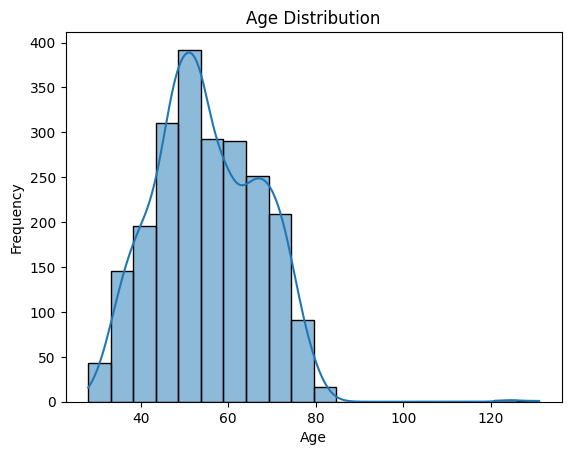

In [84]:
sns.histplot(data=marketing, x='age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(False)
plt.show()

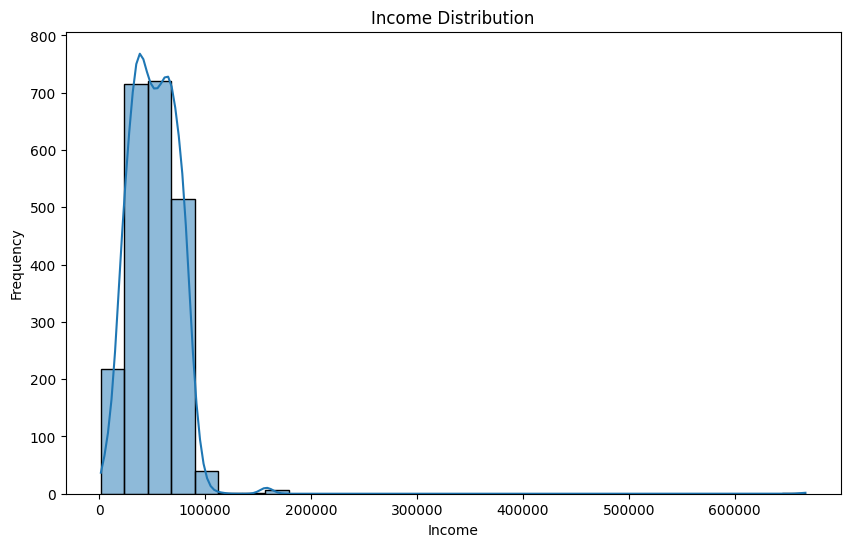

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Income', bins=30, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.grid(False)
plt.show()

**Interpretation**:
1. Most of the customers age from 50-55. The distribution of age is almost normal.
2. The mean of customer income is above \$52,000 and the median is around \$51,300. The histogram of income is right-skewed, suggesting outliers with high income.

In [86]:
# Show the distribution of the education level, add the percentage
marketing['Education'].value_counts()


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [87]:
marketing.loc[marketing['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
marketing.loc[marketing['Marital_Status'].isin(['Absurd', 'YOLO']), 'Marital_Status'] = 'Other'

marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Other         4
Name: count, dtype: int64

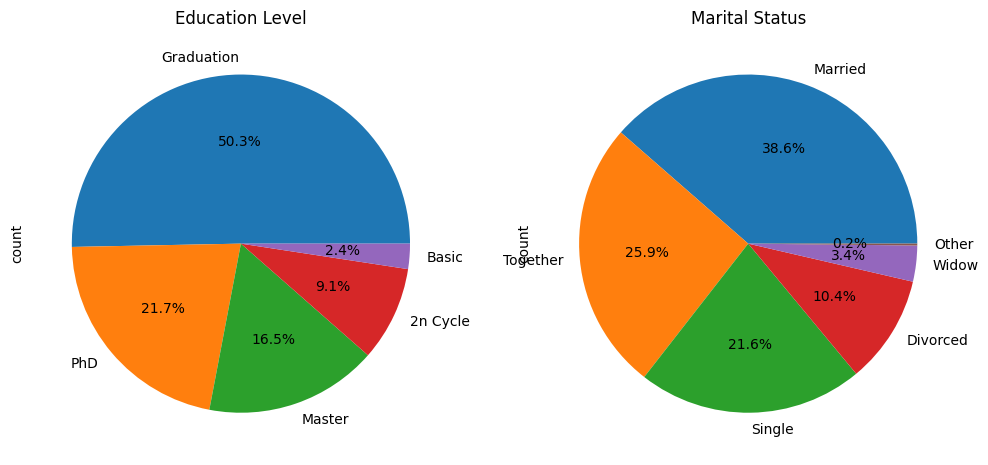

In [88]:
# Draw pie charts for education and marital status, combine into a single graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
marketing['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Education Level')
plt.subplot(1, 2, 2)
marketing['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Marital Status')
plt.show()

**Interpretations**:
1. Most of the customers are married (38.6%) or Together (25.9%).  
2. More than half of the customers have a college degree (50.3%). Nearly half of the customers have a post-secondary degree. The average level of education of the customer sample is much higher than the general population.

### Purchasing Behavior EDA

In [89]:
## Draw a pairplot for the purchase behaviour
purchase_list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_list = ['Recency', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

# Descriptive statistics
marketing[purchase_list].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


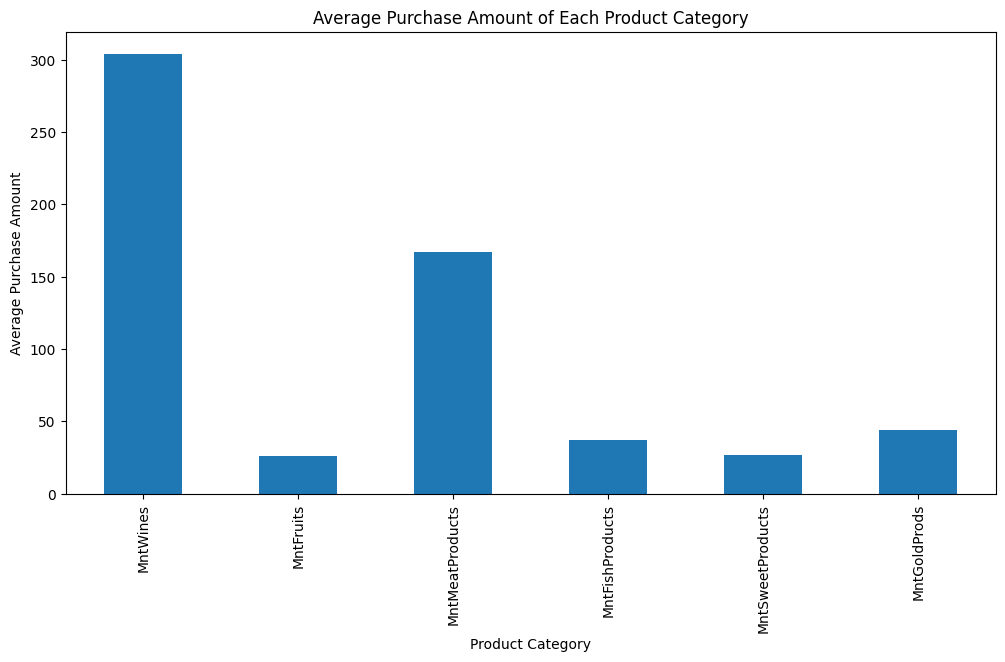

In [90]:
## Draw a barplot for the average purchase amount of each product category
plt.figure(figsize=(12, 6))
marketing[purchase_list].mean().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount of Each Product Category')
plt.show()

**Interpretations**: The customers most spent on wines and meat products. The average spending in wine products in last two years is above 300. The average spending in meat products in last two years is around 170. The other four categories have similar average spending, below 100.

<Figure size 1200x1200 with 0 Axes>

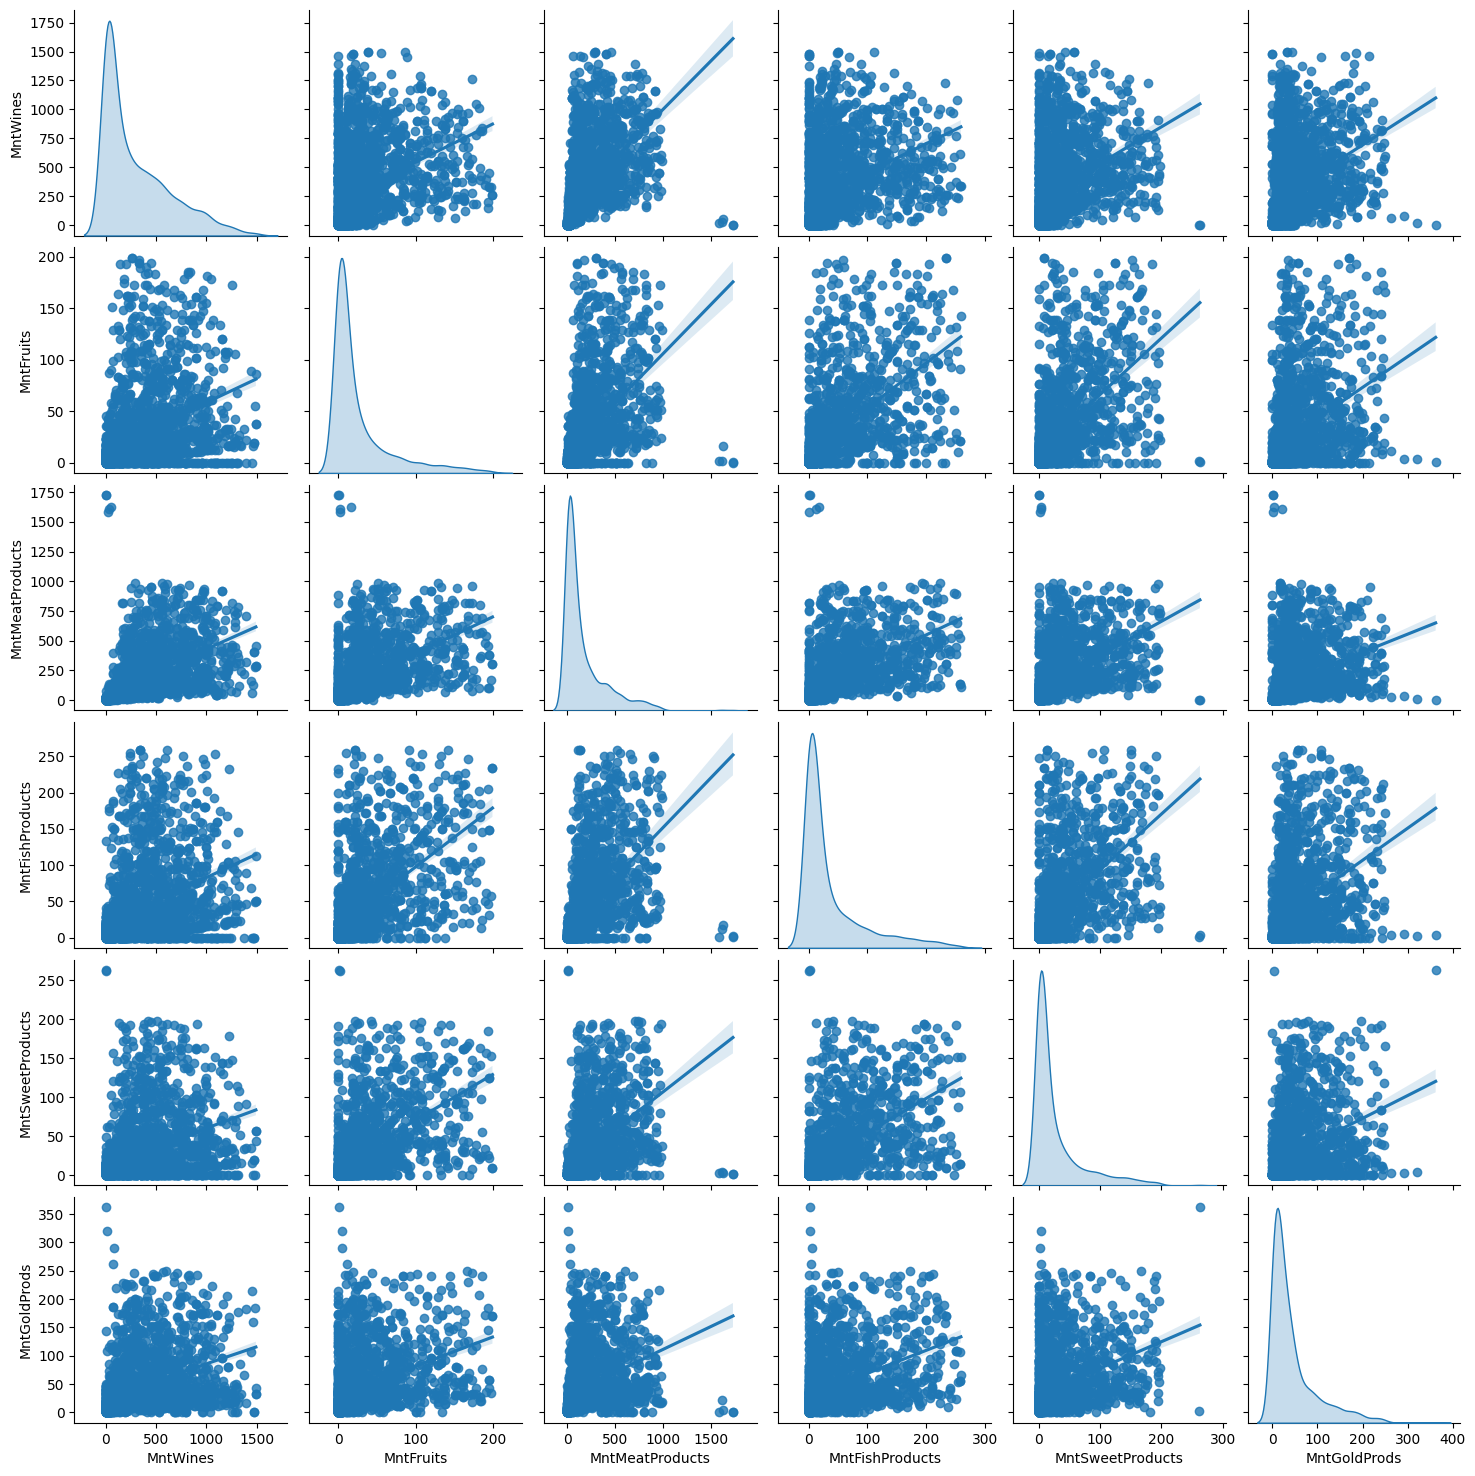

In [91]:
## Draw the pairplot for the purchase behaviour
plt.figure(figsize=(12, 12))
sns.pairplot(data=marketing, vars=purchase_list, diag_kind='kde', kind='reg')
plt.show()


**Interpretations for Purchasing Behavior**: The amounts spent on each type of products have a right skewed distribution, indicating the presence of big retail spenders. There seem to be weak to moderate correlations between amount spent in each category of goods.

In [92]:
marketing[num_list].describe()

,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,49.109375,4.084821,2.662054,5.790179,5.316518,2.325000
std,28.962453,2.778714,2.923101,3.250958,2.426645,1.932238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,0.000000,3.000000,3.000000,1.000000
50%,49.000000,4.000000,2.000000,5.000000,6.000000,2.000000
75%,74.000000,6.000000,4.000000,8.000000,7.000000,3.000000
max,99.000000,27.000000,28.000000,13.000000,20.000000,15.000000


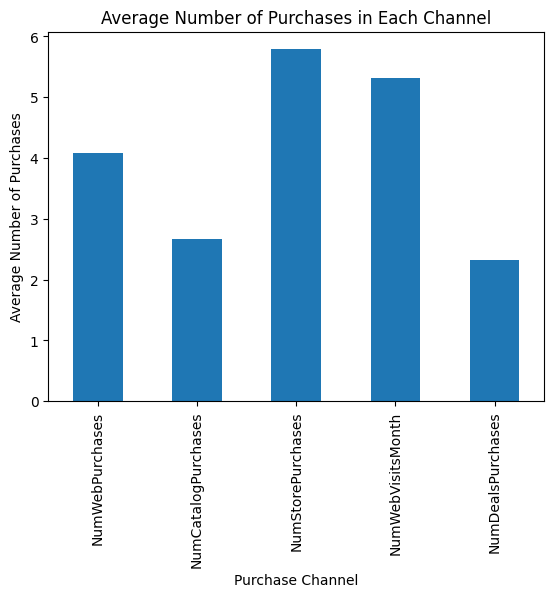

In [93]:
marketing[num_list[1:]].mean().plot(kind='bar')
plt.xlabel('Purchase Channel')
plt.ylabel('Average Number of Purchases')
plt.title('Average Number of Purchases in Each Channel')
plt.show()

**Interpretations**: Most of the customers placed orders in stores (about 6) and on websites (about 4). Customers visit the store websites more than 5 times in the last month.


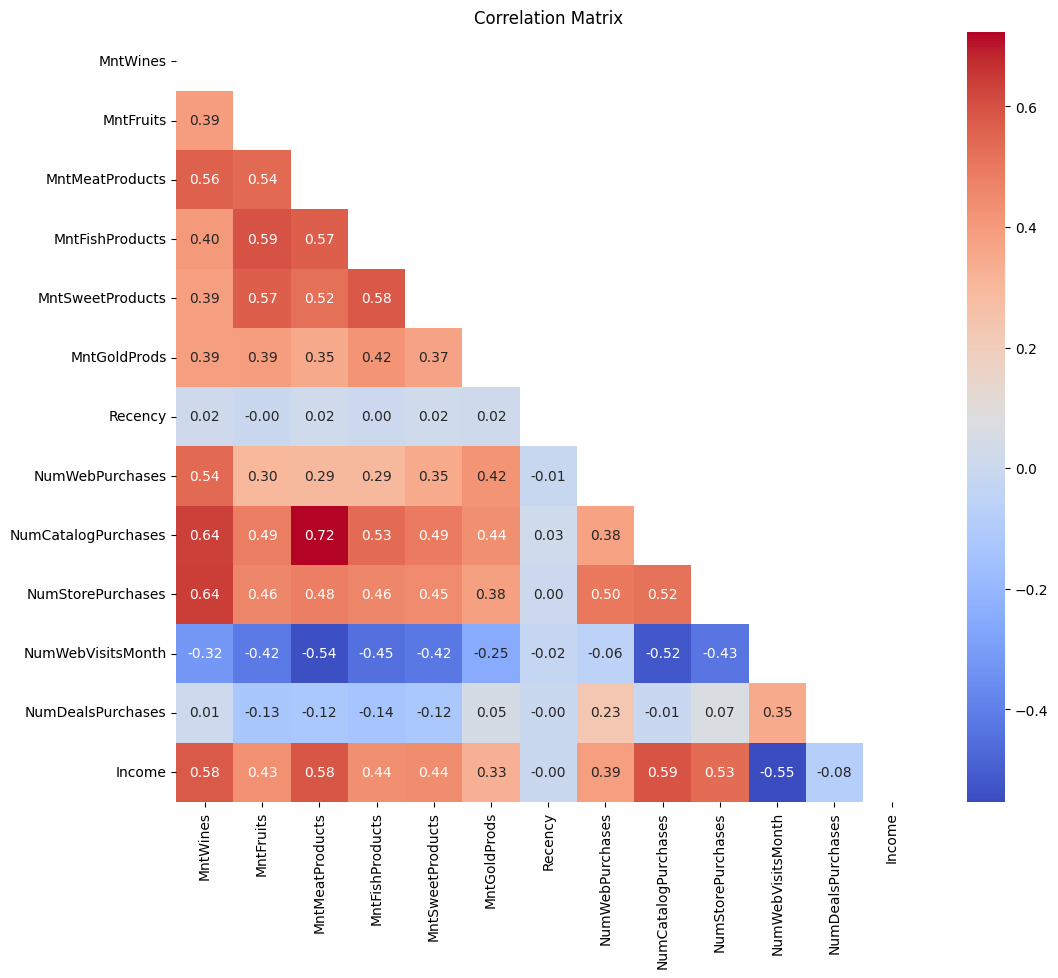

In [94]:
## Draw a pair correlation plot
corr = marketing[purchase_list + num_list + ['Income']].corr()

## Keep the upper triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

## Draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Interpretations of the Correlations**:  
The heatmap of the correlations between purchasing behavior reveals some interesting relationships. The strongest correlations are the following:
1. Strong correlation between amount spent in meat products and number of catalog purchases (0.72). Strong correlation between amount spent in wine products and number of catalog purchases (0.64). This suggests that customers who spend more on meat and wine products are more likely to make purchases from catalogs.
2. Moderate correlations between income and amount spent in wines, income and amount spent in meat products. This suggests that customers with higher income are more likely to spend more on wines and meat products.
3. Negative correlation between income and number of websites visits in the last month (-0.55). Moderate correlation between income and number of catalogue purchases (0.59). This suggests that customers with higher income are less likely to visit the store websites rather than making purchases from catalogs.

## Task 2 (1 point): Drop all columns that have constant values.

In [95]:
# find the columns with constant values
constant_cols = marketing.columns[marketing.nunique() == 1]
# drop all columns with constant values
marketing_clean = marketing.drop(columns=constant_cols)

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [96]:
# Clean the relationship status
marketing_clean['In_Relationship'] = np.where(marketing_clean['Marital_Status'].isin(['Married', 'Together']), 1, 0)
marketing_clean.drop(columns='Marital_Status', inplace=True)

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [97]:
# Impute missing income with median
print(f"There are {len(marketing_clean[marketing_clean['Income'].isnull()])} missing values in Income")
print(f"The median of the Income is {marketing_clean['Income'].median()}")
print(f"The mean of the Income is {marketing_clean['Income'].mean()}")


There are 24 missing values in Income
The median of the Income is 51381.5
The mean of the Income is 52247.25135379061


According to previous analysis of distribution of income, there are some outliers of high income that may affect the mean value. Therefore, the median value of income is more reliable than the mean value in terms of filling the null values.

In [98]:
marketing_clean['Income'] = marketing_clean['Income'].fillna(marketing_clean['Income'].median())

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [ ]:
# Construct a linear regression model
X = marketing_clean[['Income', 'In_Relationship']]
y = marketing_clean['MntWines']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions
y_pred = ols_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')
print(f'The mean of amount spent in wines {y.mean()}')
print(f'The standard deviation of amount spent in wines {y.std()}')

# Calculate the R-squared
r2 = ols_model.score(X_test, y_test)
print(f'R-squared: {r2}')


Root Mean Squared Error: 263.61704688252837
The mean of amount spent in wines 303.9357142857143
The standard deviation of amount spent in wines 336.5973926053718
R-squared: 0.407111283959246


The $RMSE$ of our model is around 263.6. It is not bad but not sp good as well, compared to the standard deviation of `MntWine` is 336.6. The $RMSE$ is not very low in comparison to the standard deviation of our target variable. But still, the $RMSE$ is acceptable. The $R^2$ also indicates that our model explains about 41% of the variance in `MntWine`, which is aligned with previous argument that the model is acceptable.

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 3 clusters using average linkage based on PCA projections of the original data onto 4 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 4 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 5 clusters.  Compare the results to the 3 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [ ]:
# insert your code here

Insert your explanations and interpretations here.

## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 2-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

In [55]:
# insert your code here

Insert your explanations and interpretations here.

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

In [ ]:
# insert your code here

Insert your explanations and interpretations here.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.